In [1]:
import gym_super_mario_bros

from nes_py.wrappers import JoypadSpace

from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Movement Possible
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [3]:
# Setup

env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env,SIMPLE_MOVEMENT)
env.action_space

Discrete(7)

In [4]:
#env1 = gym_super_mario_bros.make('SuperMarioBros-v0')
#env1.action_space     Original Action Space is 256 but JoypadSpace is taking it down to 7

In [5]:
env.observation_space.shape

(240, 256, 3)

In [6]:
SIMPLE_MOVEMENT[env.action_space.sample()] # Takes random action

['left']

In [7]:
flag = True

for frame in range(1000):
    if flag:
        env.reset()

    state, reward , flag, info = env.step(env.action_space.sample())

    env.render()

env.close()

C:\Users\prasa\miniconda3\envs\Mario\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
C:\Users\prasa\miniconda3\envs\Mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


In [8]:
from gym.wrappers import GrayScaleObservation, FrameStack

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

import matplotlib.pyplot as plt

In [22]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

env = JoypadSpace(env,SIMPLE_MOVEMENT)

#env_grey = GrayScaleObservation(env,keep_dim=True)

env = GrayScaleObservation(env,keep_dim=True)

env = DummyVecEnv([lambda:env])

env = VecFrameStack(env,4)


In [11]:
#state = env.reset()

#state_gray = env_grey.reset()

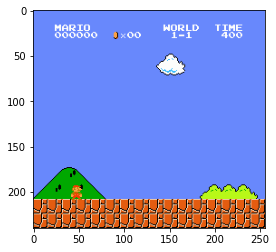

In [15]:
#plt.imshow(state)

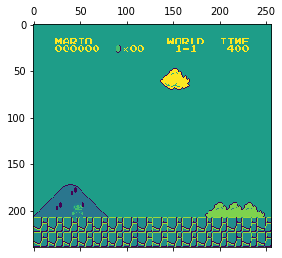

In [16]:
#plt.matshow(state_gray)

In [21]:
# After Applying DummyVecEnv
state = env.reset()
state.shape

(1, 240, 256, 1)

In [26]:
# After VecFrameStack
state = env.reset()

In [37]:
state,_,_,_ = env.step([5])

*Mario moving upwards*

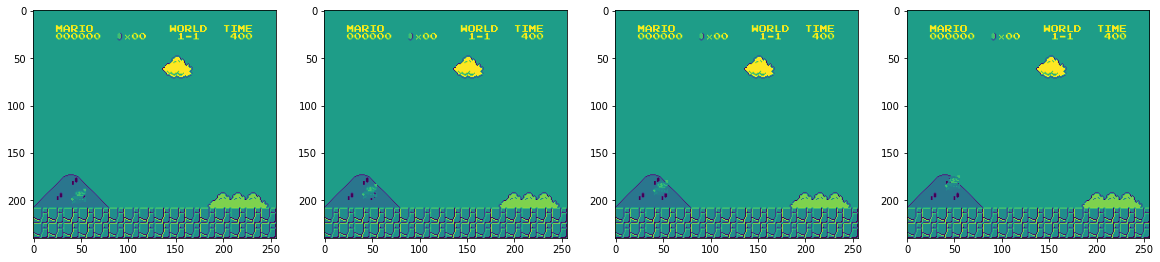

In [38]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [39]:
import os 

from stable_baselines3 import PPO

from stable_baselines3.common.callbacks import BaseCallback

In [40]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [41]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [43]:
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)

In [44]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [45]:
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_1


C:\Users\prasa\miniconda3\envs\Mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 20  |
|    iterations      | 1   |
|    time_elapsed    | 25  |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 22            |
|    iterations           | 2             |
|    time_elapsed         | 46            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 4.2801257e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.000683     |
|    learning_rate        | 1e-06         |
|    loss                 | 182           |
|    n_updates            | 10            |
|    policy_gradient_loss | -2.36e-05     |
|    value_loss           | 473           |
-------------------------------------------
-----

KeyboardInterrupt: 

In [ ]:
model.save('thisisatestmodel')

In [46]:
model = PPO.load('./train/best_model_100000')

In [47]:
state = env.reset()

In [48]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\prasa\miniconda3\envs\Mario\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [ ]:
env.close()